<a href="https://colab.research.google.com/github/AmirKhan6219/Covid-detection-using-x-ray/blob/main/Copy_of_Copy_of_Copy_of_Covid_detection_using_X_Ray.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Dataset : http://cb.lk/covid_19

!wget http://cb.lk/covid_19


--2020-10-20 13:59:52--  http://cb.lk/covid_19
Resolving cb.lk (cb.lk)... 159.89.170.74
Connecting to cb.lk (cb.lk)|159.89.170.74|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://cb.lk/covid_19 [following]
--2020-10-20 13:59:52--  https://cb.lk/covid_19
Connecting to cb.lk (cb.lk)|159.89.170.74|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0 [following]
--2020-10-20 13:59:54--  https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.1, 2620:100:6021:1::a27d:4101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip [following]
--2020-10-20 13:59:54--  https://www.dropbox.com/s/raw/7

In [ ]:
#unziping
!unzip covid_19

Archive:  covid_19
  inflating: CovidDataset/Val/Covid/88de9d8c39e946abd495b37cd07d89e5-6531-0.jpg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-8.jpg  
  inflating: CovidDataset/Val/Covid/85E52EB3-56E9-4D67-82DA-DEA247C82886.jpeg  
  inflating: CovidDataset/Val/Covid/4-x-day1.jpg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-53.jpg  
  inflating: CovidDataset/Val/Covid/4e43e48d52c9e2d4c6c1fb9bc1544f_jumbo.jpeg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-35-1.jpg  
  inflating: CovidDataset/Val/Covid/53EC07C9-5CC6-4BE4-9B6F-D7B0D72AAA7E.jpeg  
  inflating: CovidDataset/Val/Covid/6CB4EFC6-68FA-4CD5-940C-BEFA8DAFE9A7.jpeg  
  inflating: CovidDataset/Val/Covid/58cb9263f16e94305c730685358e4e_jumbo.jpeg  
  inflating: CovidDataset/Val/Covid/6b3bdbc31f65230b8cdcc3cef5f8ba8a-40ac-0.jpg  
  inflating: CovidDataset/Val/Covid/auntminnie-d-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg  
  inflating: CovidDataset/Val/Covid/6b44464d-73a7-4cf3-bbb6-ffe7

In [ ]:
Train_Path= "CovidDataset/Train"
Val_Path= "CovidDataset/Test"

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import*
from keras.models import*
from keras.preprocessing import image

In [ ]:
#CNN based model in keras

model= Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(224, 224, 3)))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss= keras.losses.binary_crossentropy, optimizer='adam', metrics=['accuracy'])


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 110, 110, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 54, 54, 64)        0

In [ ]:
# Train from scratch
train_datagen= image.ImageDataGenerator(
    rescale= 1./255,
    shear_range= 0.2,
    zoom_range= 0.2,
    horizontal_flip= True,
)

test_dataset= image.ImageDataGenerator(rescale=1./255)


In [ ]:
train_generator= train_datagen.flow_from_directory(
    'CovidDataset/Train',
    target_size= (224, 224),
    batch_size= 32,
    class_mode= 'binary'
)

Found 224 images belonging to 2 classes.


In [ ]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [ ]:
validation_generator= test_dataset.flow_from_directory(
    'CovidDataset/Val',
    target_size= (224, 224),
    batch_size= 32,
    class_mode= 'binary'
)

Found 60 images belonging to 2 classes.


In [ ]:
 hist= model.fit_generator(
     train_generator, 
     steps_per_epoch=8,
     epochs=10,
     validation_data= validation_generator,
     validation_steps=2
 )

Epoch 1/10
7/8 [=========================>....] - 9s 1s/step - loss: 0.3288 - accuracy: 0.8571 - val_loss: 0.2044 - val_accuracy: 0.9667


In [ ]:
#Loss is very less

model.save("model_adv.h5")
model.evaluate_generator(train_generator)

[0.2647601068019867, 0.9196428656578064]

In [ ]:
model.evaluate_generator(train_generator)

[0.2597534954547882, 0.9330357313156128]

In [ ]:
y_actual= []
y_test= []

In [ ]:
import os

In [ ]:
for i in os.listdir("./CovidDataset/Val/Normal/"):
  img= image.load_img("./CovidDataset/Val/Normal/"+i, target_size=(224, 224))
  img= image.img_to_array(img)
  img= np.expand_dims(img, axis=0)
  p= model.predict_classes(img)
  y_test.append(p[0,0])
  y_actual.append(1)

In [ ]:
for i in os.listdir("./CovidDataset/Val/Covid/"):
  img= image.load_img("./CovidDataset/Val/Covid/"+i, target_size=(224, 224))
  img= image.img_to_array(img)
  img= np.expand_dims(img, axis=0)
  p= model.predict_classes(img)
  y_test.append(p[0,0])
  y_actual.append(1)

In [ ]:
y_actual= np.array(y_actual)
y_test= np.array(y_test)

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
cm= confusion_matrix(y_actual, y_test)

In [ ]:
x_axis_label=['covid-19', 'normal']
y_axis_label=['covid-19', 'normal']

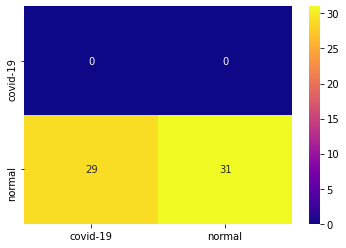

In [ ]:
sns.heatmap(cm, xticklabels=x_axis_label, yticklabels=y_axis_label, cmap="plasma", annot=True)